In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
kanser = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_egitim, X_test, y_egitim, y_test = train_test_split(kanser.data, kanser.target, stratify=kanser.target, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [7]:
logreg = LogisticRegression(solver="liblinear").fit(X_egitim,y_egitim)

In [8]:
print(logreg.score(X_egitim, y_egitim))
print(logreg.score(X_test, y_test))

0.9530516431924883
0.958041958041958


In [9]:
logreg100 = LogisticRegression(C=100, solver="liblinear").fit(X_egitim,y_egitim)

In [10]:
print(logreg100.score(X_egitim, y_egitim))
print(logreg100.score(X_test, y_test))

0.9671361502347418
0.965034965034965


In [11]:
logreg001 = LogisticRegression(C=0.01, solver="liblinear").fit(X_egitim,y_egitim)

In [12]:
print(logreg001.score(X_egitim, y_egitim))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9300699300699301


In [16]:
for C, market in zip([0.001,1,100],["o","^","v"]):
    lr_l1 = LogisticRegression(penalty="l1", solver ="liblinear", C=C).fit(X_egitim,y_egitim)
    print("C={:.3f} için eğitim doğruluk {:.2f}".format(C, lr_l1.score(X_egitim, y_egitim)))
    print("C={:.3f} için test doğruluk {:.2f}".format(C, lr_l1.score(X_test, y_test)))

C=0.001 için eğitim doğruluk 0.91
C=0.001 için test doğruluk 0.92
C=1.000 için eğitim doğruluk 0.96
C=1.000 için test doğruluk 0.96
C=100.000 için eğitim doğruluk 0.99
C=100.000 için test doğruluk 0.98


In [17]:
from sklearn.datasets import make_blobs
import mglearn

In [18]:
%matplotlib inline

In [19]:
X, y = make_blobs(random_state=42)

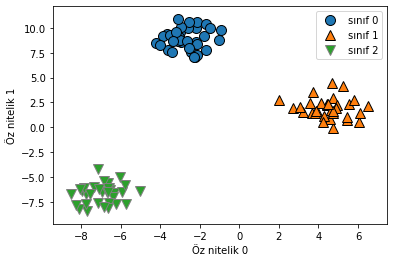

In [20]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Öz nitelik 0")
plt.ylabel("Öz nitelik 1")
plt.legend(["sınıf 0", "sınıf 1", "sınıf 2"])

In [22]:
from sklearn.svm import LinearSVC

In [23]:
linear_svm = LinearSVC().fit(X,y)

In [24]:
linear_svm.coef_

array([[-0.1749309 ,  0.23140611],
       [ 0.47621531, -0.06937484],
       [-0.18914447, -0.20399768]])

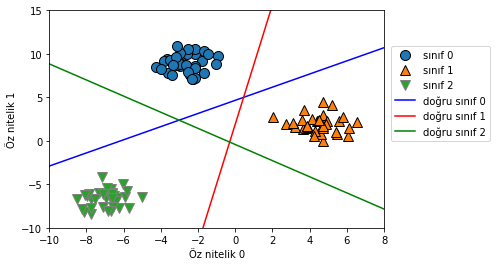

In [26]:
import numpy as np
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ["b","r","g"]):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Öz nitelik 0")
plt.ylabel("Öz nitelik 1")
plt.legend(["sınıf 0", "sınıf 1", "sınıf 2", "doğru sınıf 0", "doğru sınıf 1", "doğru sınıf 2"],
                loc = (1.02,0.4))